# data의 경로 설정 및 이미지 크기 정의

In [3]:
import os

# 경로 설정
original_dataset_dir = './dataset/original_dataset'

base_dir = './dataset'
# 미리 나눠놓은 train, test, validation 디렉토리 내의 이미지 데이터 불러오기
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')


# 이미지 크기 정의하기
HEIGHT = 150
WIDTH = 150
CHANNELS = 3

In [2]:
# dataset의 색깔, 종류 리스트
color_list = ['beige', 'black', 'brown', 'gray', 'green', 'navy', 'red', 'white']
cloth_list = ['top', 'bottom', 'etc']

# model define하기

In [4]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [5]:
model = models.Sequential()

# ConvNet 쌓아 올리기
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(HEIGHT, WIDTH, CHANNELS)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [6]:
# ConvNet 위에 분류기 추가
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))
## activation
# sigmoid : 입력값을 0과 1사이의 값으로 변환 => 이진분류에 주로 사용
# hard sigmoid : 확실하게 sigmoid 사용할 시, 빠른 연산 속도를 보장
# relu : 0 이하의 값은 다음 레이어로 전달X => CNN 학습시 많이 사용
# softmax : 모든 출력값의 상대적 크기를 고려한 값을 출력 => 다중분류에 주로 사용

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)      

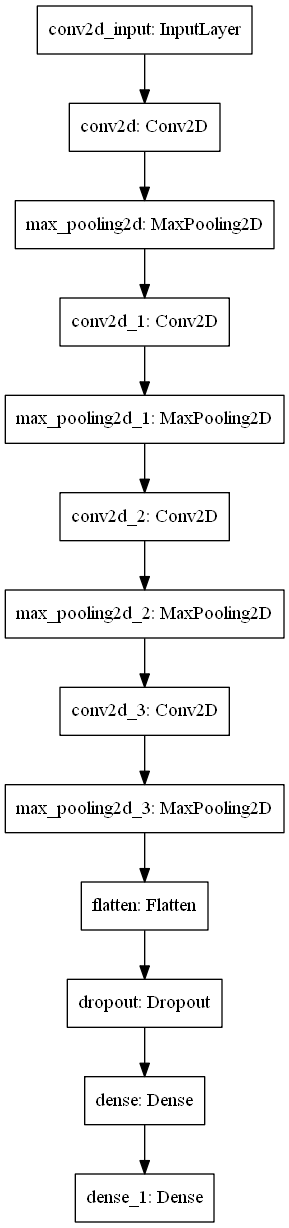

In [8]:
# 모델 층 확인(시각화)
from tensorflow import keras
keras.utils.plot_model(model, 'my_first_model2.png')

In [7]:
# model compile
from tensorflow.keras import optimizers

model.compile(loss = 'categorical_crossentropy',
optimizer = optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

## image 전처리하기
## folder째로 이미지들을 불러와서 정규화 및 resize, labeling 시키기

In [8]:
# image 전처리
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)
# target size의 HEIGHT, WIDTH는 위에서 정의해놓음
# train_dir와 test_dir, validation_dir도 위에서 정의해놓음
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (HEIGHT, WIDTH),
    batch_size = 5,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (HEIGHT,WIDTH),
    batch_size = 5,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (HEIGHT,WIDTH),
    batch_size = 5,
    class_mode='categorical'
)

Found 1800 images belonging to 8 classes.
Found 360 images belonging to 8 classes.
Found 264 images belonging to 8 classes.


## 학습 시작하기

In [11]:
history = model.fit_generator(
    train_generator,
    # steps_per_epoch=20,
    epochs = 40,
    validation_data = validation_generator)
    # validation_steps = 10

/Users/lisemara/miniforge3/envs/atf24/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
Epoch 1/40
 58/360 [===>..........................] - ETA: 13s - loss: 2.1022 - acc: 0.1714/Users/lisemara/miniforge3/envs/atf24/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
360/360 [==============================] - 17s 46ms/step - loss: 1.7095 - acc: 0.3516 - val_loss: 0.7626 - val_acc: 0.7273
Epoch 2/40
360/360 [==============================] - 16s 45ms/step - loss: 0.8083 - acc: 0.6996 - val_loss: 0.5270 - val_acc: 0.8409
Epoch 3/40
360/360 [==============================] - 16s 46ms/step - loss: 0.5138 - acc: 0.8171 - val_loss: 0.4974 - val_acc: 0.8447
Ep

In [14]:
model.save('color_best.h5')

# 결과 accuracy, loss 값 그래프 그리기

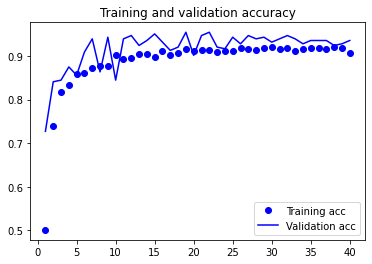

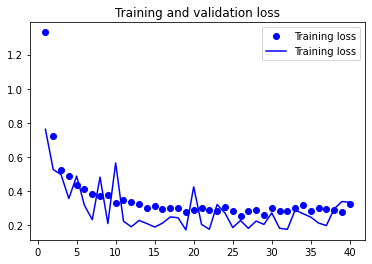

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 새로운 이미지 테스트 코드

In [27]:
from PIL import Image
import numpy as np
test_image = './my_test/3.jpg'

In [28]:
# 이미지 resize
img = Image.open(test_image)
img = img.convert("RGB")
img = img.resize((150,150))
data = np.asarray(img)

In [29]:
X = np.array(data)
X = X.astype("float") / 255
X = X.reshape(-1, 150, 150,3)

In [30]:
# 예측
pred = model.predict(X)  
result = [np.argmax(value) for value in pred]   # 예측 값중 가장 높은 클래스 반환
print('New data category : ',color_list[result[0]])


New data category :  red


In [33]:
# 모델 평가하기 
model.evaluate_generator(
    test_generator)

/Users/lisemara/miniforge3/envs/atf24/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.33167940378189087, 0.949999988079071]